# About Dataset
## Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors


---

# Data Understanding


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer




In [44]:
data = pd.read_csv('./data/Life_Expectancy_Data.csv')
data.shape



(1649, 22)

In [45]:
# Criar um novo dataset excluindo variáveis string
data2 = data.select_dtypes(include=['float64', 'int64'])
data2.head()




,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [46]:
data2.info()
data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   int64  
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   int64  
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   int64  
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [47]:
# Replacing the Null Values with mean values of the data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data2['Life expectancy ']=imputer.fit_transform(data2[['Life expectancy ']])
data2['Adult Mortality']=imputer.fit_transform(data2[['Adult Mortality']])
data2['Alcohol']=imputer.fit_transform(data2[['Alcohol']])
data2['Hepatitis B']=imputer.fit_transform(data2[['Hepatitis B']])
data2[' BMI ']=imputer.fit_transform(data2[[' BMI ']])
data2['Polio']=imputer.fit_transform(data2[['Polio']])
data2['Total expenditure']=imputer.fit_transform(data2[['Total expenditure']])
data2['Diphtheria ']=imputer.fit_transform(data2[['Diphtheria ']])
data2['GDP']=imputer.fit_transform(data2[['GDP']])
data2['Population']=imputer.fit_transform(data2[['Population']])
data2[' thinness  1-19 years']=imputer.fit_transform(data2[[' thinness  1-19 years']])
data2[' thinness 5-9 years']=imputer.fit_transform(data2[[' thinness 5-9 years']])
data2['Income composition of resources']=imputer.fit_transform(data2[['Income composition of resources']])
data2['Schooling']=imputer.fit_transform(data2[['Schooling']])

In [48]:
data2.corr().head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975


---
# Exploratory Data Analysis

1. Preparação dos Dados


In [49]:
# Limpar os nomes das colunas
data.columns = data.columns.str.strip()

# Tratar valores ausentes para 'GDP' e 'Schooling'
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['Schooling'] = data['Schooling'].fillna(data['Schooling'].median())

# Ajustar os nomes das colunas para corresponder ao dataset
selected_columns = [
    'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
    'infant deaths', 'Alcohol', 'percentage expenditure', 'GDP',
    'Schooling'
]
prepared_data = data[selected_columns]

# Criar atributos adicionais
prepared_data = prepared_data.copy()  # Garante que é uma cópia independente do DataFrame original
prepared_data.loc[:, 'Life_Expectancy'] = prepared_data['Life expectancy']
prepared_data.loc[:, 'GDP_Per_Schooling'] = prepared_data['GDP'] / prepared_data['Schooling']
prepared_data.loc[:, 'Infant_Mortality_Rate'] = prepared_data['infant deaths'] / prepared_data['Life_Expectancy']
prepared_data.loc[:, 'Health_Expenditure_Ratio'] = prepared_data['percentage expenditure'] / prepared_data['GDP']

# Renomear as colunas para consistência
formatted_data = prepared_data.rename(columns={
    'Life expectancy': 'Life_Expectancy',
    'Adult Mortality': 'Adult_Mortality',
    'infant deaths': 'Infant_Deaths',
    'percentage expenditure': 'Percentage_Expenditure'
})

# Remover possíveis duplicatas de colunas para evitar problemas na visualização
formatted_data = formatted_data.loc[:, ~formatted_data.columns.duplicated()]

# Variáveis numéricas principais
key_numeric_variables = ['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 
                         'Alcohol', 'Percentage_Expenditure', 'GDP', 'Schooling']

# Garantir que as variáveis necessárias estão presentes
missing_variables = [var for var in key_numeric_variables if var not in formatted_data.columns]
if missing_variables:
    print(f"As seguintes variáveis estão ausentes: {missing_variables}")

# Normalizar variáveis numéricas principais para análises futuras
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
formatted_data[key_numeric_variables] = scaler.fit_transform(formatted_data[key_numeric_variables])

# Relatório descritivo
descriptive_statistics = formatted_data[key_numeric_variables].describe()

# Exibir estatísticas descritivas
print("Estatísticas descritivas das variáveis principais:")
print(descriptive_statistics)


Estatísticas descritivas das variáveis principais:
       Life_Expectancy  Adult_Mortality  Infant_Deaths      Alcohol  \
count      1649.000000      1649.000000    1649.000000  1649.000000   
mean          0.562273         0.231600       0.020346     0.253258   
std           0.195485         0.173560       0.075529     0.225598   
min           0.000000         0.000000       0.000000     0.000000   
25%           0.453333         0.105263       0.000625     0.044793   
50%           0.615556         0.203601       0.001875     0.211646   
75%           0.688889         0.313019       0.013750     0.410414   
max           1.000000         1.000000       1.000000     1.000000   

       Percentage_Expenditure          GDP    Schooling  
count             1649.000000  1649.000000  1649.000000  
mean                 0.036863     0.046692     0.479993  
std                  0.092780     0.096298     0.169417  
min                  0.000000     0.000000     0.000000  
25%                

In [50]:
data.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [51]:
# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação para as colunas numéricas
correlation_matrix = numeric_data.corr()

# Exibir as cinco primeiras linhas
print("Correlation Matrix:")
print(correlation_matrix.head())


Correlation Matrix:
                     Year  Life expectancy  Adult Mortality  infant deaths  \
Year             1.000000         0.050771        -0.037092       0.008029   
Life expectancy  0.050771         1.000000        -0.702523      -0.169074   
Adult Mortality -0.037092        -0.702523         1.000000       0.042450   
infant deaths    0.008029        -0.169074         0.042450       1.000000   
Alcohol         -0.113365         0.402718        -0.175535      -0.106217   

                  Alcohol  percentage expenditure  Hepatitis B   Measles  \
Year            -0.113365                0.069553     0.114897 -0.053822   
Life expectancy  0.402718                0.409631     0.199935 -0.068881   
Adult Mortality -0.175535               -0.237610    -0.105225 -0.003967   
infant deaths   -0.106217               -0.090765    -0.231769  0.532680   
Alcohol          1.000000                0.417047     0.109889 -0.050110   

                      BMI  under-five deaths     Polio

---
2. Visualização dos Dados

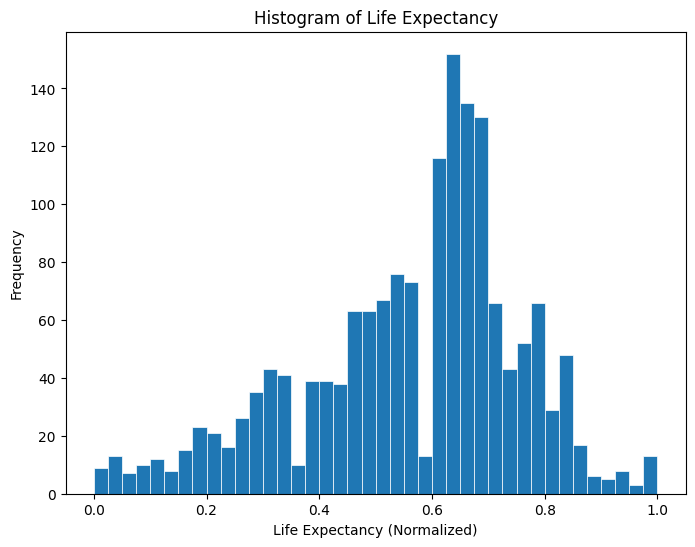

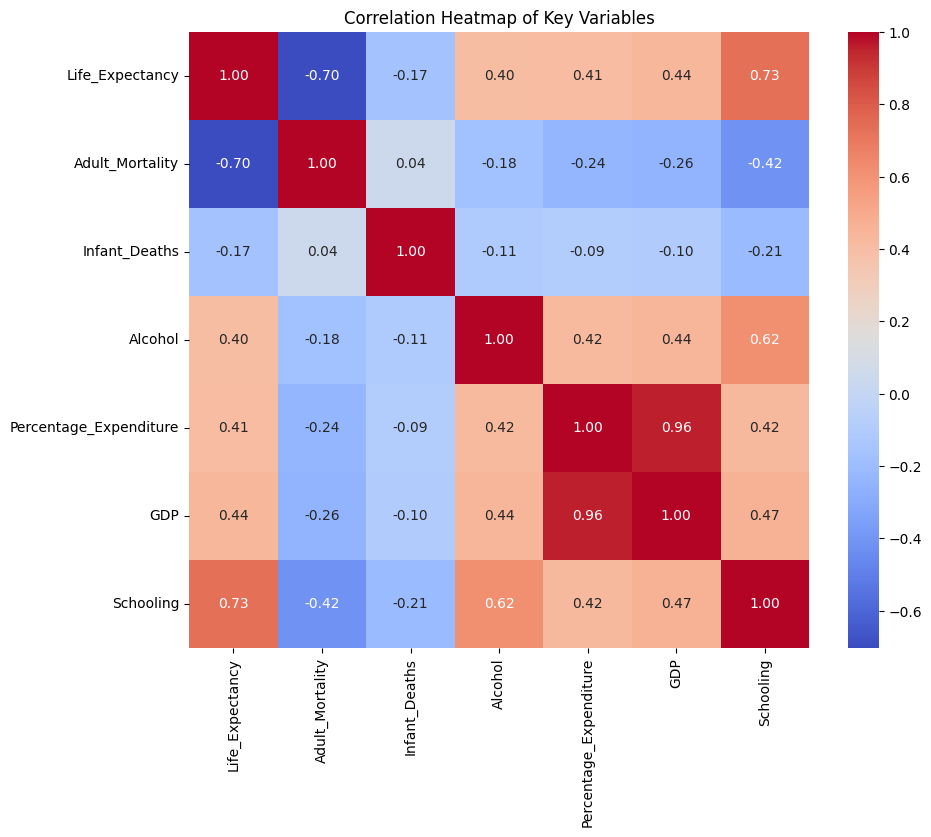

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar um histograma para 'Life_Expectancy'
x = formatted_data['Life_Expectancy']

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")
ax.set_title("Histogram of Life Expectancy")
ax.set_xlabel("Life Expectancy (Normalized)")
ax.set_ylabel("Frequency")
plt.show()

# Plotar a matriz de correlação
correlation_matrix = formatted_data[key_numeric_variables].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap of Key Variables")
plt.show()


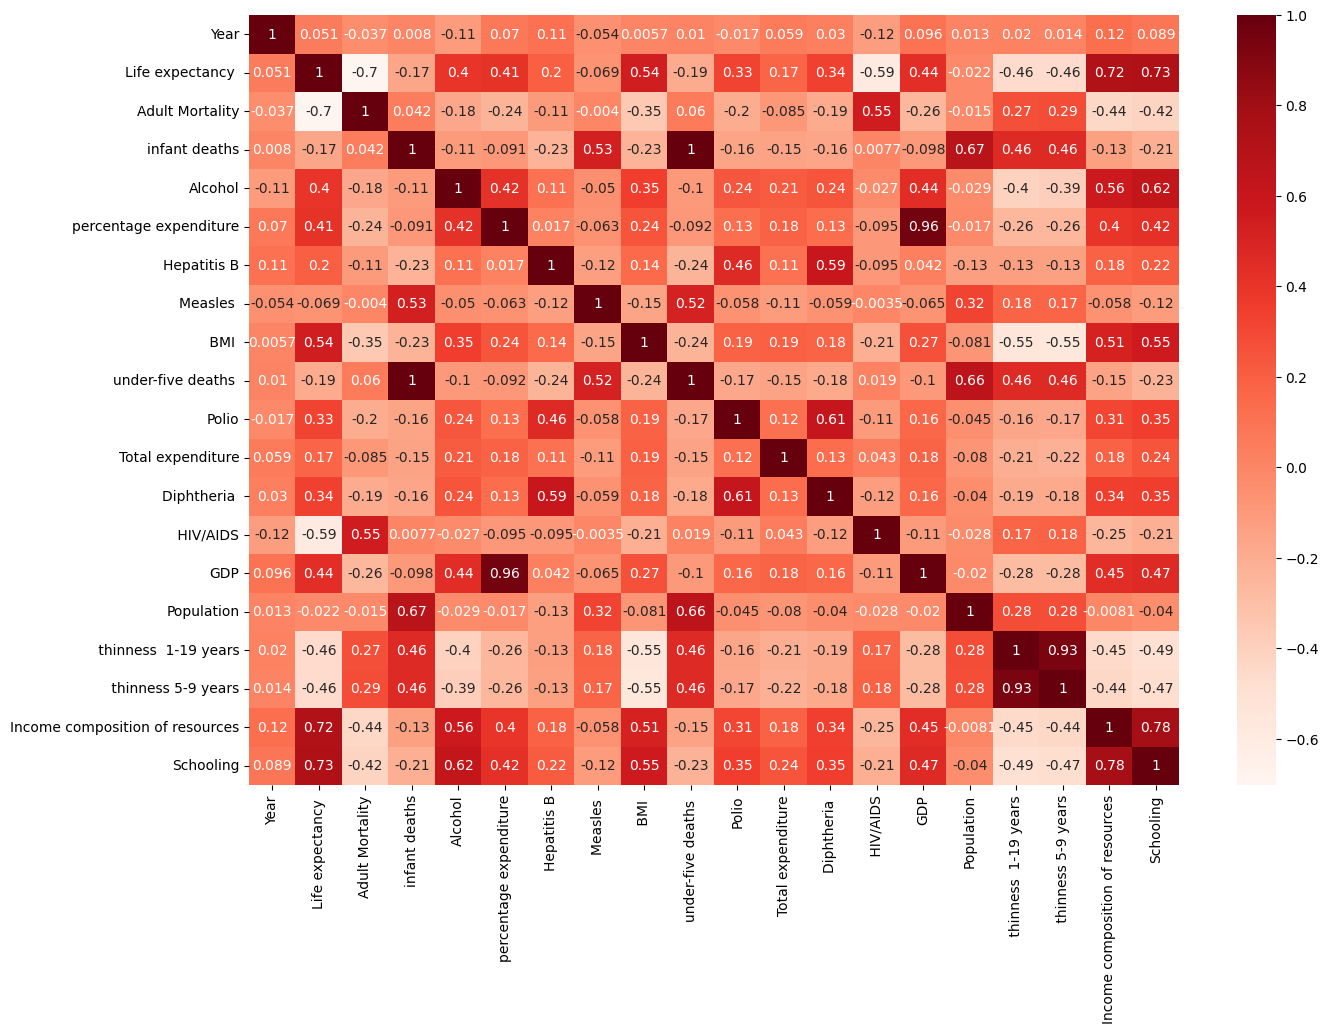

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),annot=True,cmap='Reds')
plt.show()

In [54]:
import plotly.express as px

fig = px.violin(
    data,
    x='Status',
    y='Life expectancy',  # Nome correto da coluna
    color='Status',
    template='plotly_dark',
    box=True,
    title='Life Expectancy Based on Country Status'
)
fig.show()

In [55]:
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [56]:
px.scatter(data,y='Adult Mortality',x='Life expectancy',color='Country',size='Life expectancy',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')


In [57]:
px.scatter_3d(data.sort_values(by='Year'),y='Adult Mortality',x='Life expectancy',z='infant deaths',size='Life expectancy',template='plotly_dark',color='Country')
